## Functions

In [ ]:
get_ipython().system(u' pip install beautifulsoup4')
!pip install lxml
!pip install beautifulsoup4 as bs4

from lxml import html
from bs4 import BeautifulSoup
import urllib.request
import pandas as pd
import numpy as np
import re
from IPython.display import clear_output

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [ ]:
# This cell categorizes all of the teams by conference as well as by conference power designation

ACC = ['Boston College','Clemson','Duke','Florida State','Georgia Tech','Louisville','Miami (FL)','North Carolina','North Carolina State','Pittsburgh','Syracuse','Virginia','Virginia Tech','Wake Forest' ]
AAC = ['Cincinnati','East Carolina','Houston','Memphis','Navy','SMU','South Florida','Temple','Tulane','Tulsa','UCF']
Big_Ten = ['Illinois','Indiana','Iowa','Maryland','Michigan','Michigan State','Minnesota','Nebraska','Northwestern','Ohio State','Penn State','Purdue','Rutgers','Wisconsin']
Big_12 = ['Baylor','Iowa State','Kansas','Kansas State','Oklahoma','Oklahoma State','TCU','Texas','Texas Tech','West Virginia']
Conference_USA = ['Charlotte','FIU','Florida Atlantic','Louisiana Tech','Marshall','Middle Tennessee','North Texas','Old Dominion','Rice','Southern Miss','UAB','UTEP','UTSA','Western Kentucky']
Independents = ['Army','BYU','Liberty','New Mexico State','Notre Dame','UConn','UMass']
MAC = ['Akron','Ball State','Bowling Green','Buffalo','Central Michigan','Eastern Michigan','Kent State','Miami (OH)','Northern Illinois','Ohio','Toledo','Western Michigan']
Mountain_West = ['Air Force','Boise State','Colorado State','Fresno State','Hawaii','Nevada','New Mexico','San Diego State','San Jose State','UNLV','Utah State','Wyoming']
Pac_12 = ['Arizona','Arizona State','California','Colorado','Oregon','Oregon State','Stanford','UCLA','USC','Utah','Washington','Washington State']
SEC = ['Alabama','Arkansas','Auburn','Florida','Georgia','Kentucky','LSU','Mississippi State','Missouri','Ole Miss','South Carolina','Tennessee','Texas A&M','Vanderbilt']
Sun_Belt = ['Appalachian State','Arkansas State','Coastal Carolina','Georgia Southern','Georgia State','Louisiana-Lafayette','Louisiana-Monroe','South Alabama','Texas State','Troy']
FBS_Teams = ACC + AAC + Big_Ten + Big_12 + Conference_USA + Independents + MAC + Mountain_West + Pac_12 + SEC + Sun_Belt
ND = ['Notre Dame']
P5 = ACC + Big_Ten + Big_12 + Pac_12 + SEC + ND
G5 = [x for x in FBS_Teams if x not in P5]
All = []
print('ACC:',len(ACC))
print('AAC:',len(AAC))
print('Big Ten:',len(Big_Ten))
print('Big 12:',len(Big_12))
print('Conference USA:',len(Conference_USA))
print('Independents:',len(Independents))
print('MAC:',len(MAC))
print('Mountain West:',len(Mountain_West))
print('Pac 12:',len(Pac_12))
print('SEC:',len(SEC))
print('Sun Belt:',len(Sun_Belt))
print('FBS Teams:',len(FBS_Teams))
print('P5:',len(P5))
print('G5:',len(G5))

ACC: 14
AAC: 11
Big Ten: 14
Big 12: 10
Conference USA: 14
Independents: 7
MAC: 12
Mountain West: 12
Pac 12: 12
SEC: 14
Sun Belt: 10
FBS Teams: 130
P5: 65
G5: 65


In [ ]:
ACC_2 = ['Boston College','Clemson','Duke','Florida State','Georgia Tech','Louisville','Miami (FL)','North Carolina','North Carolina State','Notre Dame','Pittsburgh','Syracuse','Virginia','Virginia Tech','Wake Forest' ]
AAC_2 = ['Charlotte','East Carolina','Florida Atlantic','Memphis','Navy','North Texas','Rice','SMU','South Florida','Temple','Tulane','Tulsa','UAB','UTSA']
Big_12_2 = ['Baylor','BYU','Cincinnati','Houston','Iowa State','Kansas','Kansas State','Oklahoma State','TCU','Texas Tech','UCF','West Virginia']
Conference_USA = ['Charlotte','FIU','Florida Atlantic','Louisiana Tech','Marshall','Middle Tennessee','North Texas','Old Dominion','Rice','Southern Miss','UAB','UTEP','UTSA','Western Kentucky']
Independents_2 = ['Army','Liberty','New Mexico State','UConn','UMass']
SEC_2 = ['Alabama','Arkansas','Auburn','Florida','Georgia','Kentucky','LSU','Mississippi State','Missouri','Oklahoma','Ole Miss','South Carolina','Tennessee','Texas','Texas A&M','Vanderbilt']
Sun_Belt = ['Appalachian State','Arkansas State','Coastal Carolina','Georgia Southern','Georgia State','Louisiana-Lafayette','Louisiana-Monroe','South Alabama','Texas State','Troy']


In [ ]:
# This function takes a team name as an input and reads the data from Winsipedia and creates a dataframe for a that team

def get_Teams_Played(team):
    print(team)
    team = team.replace(' ','-').lower()
    team = team.replace('(','')
    team = team.replace(')','')
    team = team.replace('&','')
    team = team.replace('uconn','connecticut')
    
    url="http://winsipedia.com/{}".format(team)

    # use urllib and BeautifulSoup in order to open and copy the html code of the webpage to another variable
    page = urllib.request.urlopen(url)
    soup = BeautifulSoup(page, 'lxml')
    # use soup.find in order to pull out only the html code related to the data wanted
    #pop_table = soup.find('table', class_='wikitable sortable')
    matchup_table = soup.find('div', class_="row-fluid matchupslist row4")
    #print(matchup_table,"1")
    #tag = soup('<div', 'html.parser').div
    #print(tag)
    section = soup.section
    #a = div.a
    #print(section)
    A = []
    B = []
    conference = []
    for row in matchup_table.findAll('li'):
        team = row.find(text=True)
        A.append(team)
        if team in ACC:
            conference.append('ACC')
        if team in AAC:
            conference.append('The American')
        if team in Big_Ten:
            conference.append('B1G')
        if team in Big_12:
            conference.append('Big 12')
        if team in Conference_USA:
            conference.append('CUSA')
        if team in Independents:
            conference.append('Independents')
        if team in MAC:
            conference.append('MAC')
        if team in Mountain_West:
            conference.append('Mountain West')
        if team in Pac_12:
            conference.append('Pac 12')
        if team in SEC:
            conference.append('SEC')
        if team in Sun_Belt:
            conference.append('Sun Belt')
        if team not in FBS_Teams:
            conference.append('Non FBS')
        strip = row.text.strip()
        B.append(strip)    
    df = pd.DataFrame(A,columns = ['Team'])
    C = []
    D = []
    E = []
    F = []
    for s in B:
        C.append(re.split('(\d+)',s))
    C
    for list in C:
        D.append(list[1])
        E.append(list[3])
        F.append(list[5])
    df['Conference'] = conference
    df['Wins'] = D
    df['Losses'] = E
    df['Ties'] = F
    df['Wins'] = df['Wins'].astype(int)
    df['Losses'] = df['Losses'].astype(int)
    df['Ties'] = df['Ties'].astype(int)
    df['Games Played'] = (df['Wins'])+(df['Losses'])+(df['Ties'])
    df['Differential'] = (df['Wins'])-(df['Losses'])
    GB = []
    for dif in df['Differential']:
        if dif > 0:
            GB.append(0)
        if dif < 1:
            GB.append(abs(dif)+1)
    df['Games Behind'] = GB
    df.sort_values(by= 'Games Played', axis = 0, ascending = False, inplace = True)
    clear_output(wait=True)

    return(df)

In [ ]:
# This function takes a team and a list of teams and returns a new list of every 
# team from the original list that the given team has not played

def get_Teams_Unplayed(team, FBS_Teams):
    Played_df = get_Teams_Played(team)
    teams_played = Played_df['Team'].to_list()
    teams_unplayed = [x for x in FBS_Teams if x not in teams_played]
    teams_unplayed.remove(team)
    return(teams_unplayed)

In [ ]:
# This function takes a team as an input and returns a dataframe with information 
# about that teams record against every team it has and has not played against

def get_All_df(team):
    Played_df = get_Teams_Played(team)
    teams_played = Played_df['Team'].to_list()
    teams_unplayed = [x for x in FBS_Teams if x not in teams_played]
    teams_unplayed.remove(team)
    length = len(teams_unplayed)
    zeros = np.zeros(length)
    conference = []
    for team in teams_unplayed:
        if team in ACC:
            conference.append('ACC')
        if team in AAC:
            conference.append('The American')
        if team in Big_Ten:
            conference.append('B1G')
        if team in Big_12:
            conference.append('Big 12')
        if team in Conference_USA:
            conference.append('CUSA')
        if team in Independents:
            conference.append('Independent')
        if team in MAC:
            conference.append('MAC')
        if team in Mountain_West:
            conference.append('Mountain West')
        if team in Pac_12:
            conference.append('Pac 12')
        if team in SEC:
            conference.append('SEC')
        if team in Sun_Belt:
            conference.append('Sun Belt')
        if team not in FBS_Teams:
            conference.append('Non FBS')
    
    df = pd.DataFrame(teams_unplayed,columns = ['Team'])
    df['Conference'] = conference
    df['Wins'] = zeros
    df['Losses'] = zeros
    df['Ties'] = zeros
    df['Wins'] = df['Wins'].astype(int)
    df['Losses'] = df['Losses'].astype(int)
    df['Ties'] = df['Ties'].astype(int)
    df['Games Played'] = (df['Wins'])+(df['Losses'])+(df['Ties'])
    df['Differential'] = (df['Wins'])-(df['Losses'])
    df['Games Behind'] = zeros

    dfs = [Played_df,df]
    df = pd.concat(dfs)

    GB = []
    for dif in df['Differential']:
        if dif > 0:
            GB.append(0)
        if dif < 1:
            GB.append(abs(dif)+1)
    df['Games Behind'] = GB
    #df = df[df['Conference'] != "Non FBS"]
    df.reset_index(inplace=True)
    return(df)

In [ ]:
def get_Team_Info(Team,include):
    All_df = get_All_df(Team)
    if include != All:

        for team, ind in zip(All_df['Team'], All_df.index):
            if team not in include:
                All_df.drop(axis = 0, index = ind, inplace = True)
    if Team in include:
        total = len(include) - 1
    else:
        total = len(include)
    df = All_df

    if Team in ACC:
        conference = 'ACC'
    if Team in AAC:
        conference = 'The American'
    if Team in Big_Ten:
        conference = 'B1G'
    if Team in Big_12:
        conference = 'Big 12'
    if Team in Conference_USA:
        conference = 'CUSA'
    if Team in Independents:
        conference = 'Independent'
    if Team in MAC:
        conference = 'MAC'
    if Team in Mountain_West:
        conference = 'Mountain West'
    if Team in Pac_12:
        conference = 'Pac 12'
    if Team in SEC:
        conference = 'SEC'
    if Team in Sun_Belt:
        conference = 'Sun Belt'
    
    Wins = sum(df['Wins'].to_list())
    Losses = sum(df['Losses'].to_list())
    Ties = sum(df['Ties'].to_list())
    Games_Played = sum(df['Games Played'].to_list())
    if Games_Played != 0:    
        Win_Percentage = (Wins + (Ties/2)) / (Games_Played)
    else:
        Win_Percentage = 0
    Adjusted_Win_Percentage = (Wins + 1 + (Ties/2)) / (Games_Played + 2)
    Differential = sum(df['Differential'].to_list())
    Games_Behind = sum(df['Games Behind'].to_list())
    Played = []
    Unplayed = []
    for teams, GP in zip(df['Team'], df['Games Played']):
        if GP == 0:
            Unplayed.append(teams)
        if GP != 0:
            Played.append(teams)
    Teams_Played = (str(len(Played))+'/'+(str(total)))
    total2 = [i for i in df['Differential'] if i > 0]
    Winning_Records = (str(len(total2))+'/'+(str(total)))
    if len(Played) == 0:
        Leading_Percentage = 0
    else:
        Leading_Percentage = (len(total2))/(total)
    df_Team_info = pd.DataFrame([Team],columns = ['Team'])
    df_Team_info['Conference'] = conference
    df_Team_info['Wins'] = Wins
    df_Team_info['Losses'] = Losses
    df_Team_info['Ties'] = Ties
    df_Team_info['Games Played'] = Games_Played
    df_Team_info['Win Percentage'] = Win_Percentage
    df_Team_info['Differential'] = Differential
    df_Team_info['Matchups'] = Teams_Played
    df_Team_info['Leading Series'] = Winning_Records
    df_Team_info['Games Behind'] = int(Games_Behind)
    df_Team_info['Adjusted Win Percentage'] = Adjusted_Win_Percentage
    df_Team_info['Leading Percentage'] = Leading_Percentage
    df_Team_info['Score'] = (Adjusted_Win_Percentage + Leading_Percentage)/2

    return(df_Team_info)

In [ ]:
def get_Team_Data_VS(team_list):

    column_names = ['Rank','Team','Conference','Wins','Losses','Ties','Games Played','Win Percentage','Differential','Matchups','Leading Series','Games Behind','Adjusted Win Percentage','Leading Percentage','Score']
    df_Teams = pd.DataFrame(columns = column_names)
    for team in FBS_Teams:
        new_df = get_Team_Info(team,team_list)
        df_Teams = df_Teams.append(new_df, ignore_index = True)
        clear_output(wait=True)
    R = get_Ranking(df_Teams.Score)
    df_Teams['Rank'] = R    
    pd.set_option("display.max_rows", None, "display.max_columns", None)
    df_Teams.sort_values(by= ['Score','Differential'], axis = 0, ascending = False, inplace = True)

    return(df_Teams)

In [ ]:
def get_Conference_Data_VS(df):

    column_names = ['Conference','Wins','Losses','Ties','Games Played','Differential','Win Percentage','Games Behind']
    df_Teams = pd.DataFrame(columns = column_names)
    Conference_List = ['ACC','The American','B1G','Big 12','CUSA','MAC','Mountain West','Pac 12','SEC','Sun Belt','Independent']
    Conferences = []
    Wins = []
    Losses = []
    Ties = []
    GP = []
    WP = []
    Diff = []
    GB = []
    TP = []
    WR = []
    LP = []
    Score = []
    for conference in Conference_List:
        df_Conference = df[df['Conference'] == conference]
        Conferences.append(conference)
        Wins.append(df_Conference['Wins'].sum())
        Losses.append(df_Conference['Losses'].sum())
        Ties.append(df_Conference['Ties'].sum())
        GP.append(df_Conference['Games Played'].sum())
        if df_Conference['Games Played'].sum() != 0:
            Win_P = (df_Conference['Wins'].sum()+(df_Conference['Ties'].sum()/2))/df_Conference['Games Played'].sum()
            WP.append(Win_P)
        else:
            WP.append(0)
        Diff.append(df_Conference['Differential'].sum())
        GB.append(df_Conference['Games Behind'].sum())
        Teams_Played = 0
        Teams_Leading = 0
        Teams_Total = 0
        for played, wins in zip(df_Conference['Matchups'], df_Conference['Leading Series']):
            mid = played.find('/')
            mid2 = wins.find('/')
            Teams_Played = Teams_Played + int(played[0:mid])
            Teams_Leading = Teams_Leading + int(wins[0:mid2])
            Teams_Total = Teams_Total + int(played[mid+1:])
        TP.append(str(Teams_Played)+'/'+str(Teams_Total))
        WR.append(str(Teams_Leading)+'/'+str(Teams_Total))
        LP.append(Teams_Leading/Teams_Total)
        Score.append(Win_P + (float(Teams_Leading)/float(Teams_Total))/2)
    df_Conference_info = pd.DataFrame(Conference_List,columns = ['Conference'])
    df_Conference_info['Wins'] = Wins
    df_Conference_info['Losses'] = Losses
    df_Conference_info['Ties'] = Ties
    df_Conference_info['Games Played'] = GP
    df_Conference_info['Win Percentage'] = WP
    df_Conference_info['Differential'] = Diff
    df_Conference_info['Games Behind'] = GB
    df_Conference_info['Matchups'] = TP
    df_Conference_info['Leading Series'] = WR
    df_Conference_info['Leading Percentage'] = LP
    df_Conference_info['Score'] = Score

    df_Conference_info.sort_values(by= 'Score', axis = 0, ascending = False, inplace = True)

    return(df_Conference_info)

In [ ]:
def get_Ranking(Lists):
    List_Sorted = (Lists[:])
    List_Sorted = list(map(float, List_Sorted))
    List_Sorted.sort(reverse = True)
    Ranking = []
    i = 1
    R = 1
    item = List_Sorted[0]    
    Ranks = [R]
    items = [item]
    for L in List_Sorted:
        if L != item:
            R = i
            item = L
            Ranks.append(R)
            items.append(item)
        i = i + 1

    Rank_dict = {items[i] : Ranks[i] for i in range(len(items))}
    for L in Lists:
        A = Rank_dict[float(L)]
        Ranking.append(A)
    return(Ranking)

## VS Data

### VS FBS

#### Teams

In [ ]:
Teams_VS_FBS = get_Team_Data_VS(FBS_Teams)
Teams_VS_FBS

,Rank,Team,Conference,Wins,Losses,Ties,Games Played,Win Percentage,Differential,Matchups,Leading Series,Games Behind,Adjusted Win Percentage,Leading Percentage,Score
34,1,Ohio State,B1G,772,273,34,1079,0.731233,499,88/129,70/129,89,0.730805,0.542636,0.636720
43,2,Oklahoma,Big 12,819,313,41,1173,0.715686,506,90/129,68/129,98,0.715319,0.527132,0.621225
35,3,Penn State,B1G,639,302,22,963,0.674974,337,91/129,72/129,93,0.674611,0.558140,0.616375
29,4,Michigan,B1G,793,310,30,1133,0.713151,483,87/129,67/129,79,0.712775,0.519380,0.616078
106,5,Alabama,SEC,786,312,39,1137,0.708443,474,84/129,66/129,85,0.708077,0.511628,0.609853
67,6,Notre Dame,Independent,751,314,31,1096,0.699361,437,82/129,65/129,87,0.698998,0.503876,0.601437
117,7,Tennessee,SEC,668,386,45,1099,0.628298,282,98/129,73/129,118,0.628065,0.565891,0.596978
46,8,Texas,Big 12,814,364,28,1206,0.686567,450,84/129,65/129,92,0.686258,0.503876,0.595067
32,9,Nebraska,B1G,779,389,35,1203,0.662095,390,92/129,66/129,136,0.661826,0.511628,0.586727
110,10,Georgia,SEC,709,396,46,1151,0.635969,313,87/129,65/129,105,0.635733,0.503876,0.569804


#### Conferences

In [ ]:
Conferences_VS_FBS = get_Conference_Data_VS(Teams_VS_FBS)
Conferences_VS_FBS

,Conference,Wins,Losses,Ties,Games Played,Win Percentage,Differential,Games Behind,Matchups,Leading Series,Leading Percentage,Score
8,SEC,7955,6571,524,15050,0.545980,1384,3009,1152/1806,722/1806,0.399779,0.745869
2,B1G,7514,6393,435,14342,0.539081,1121,3154,1131/1806,681/1806,0.377076,0.727619
3,Big 12,5087,4880,315,10282,0.510066,207,2622,837/1290,442/1290,0.342636,0.681384
7,Pac 12,6044,5300,351,11695,0.531808,744,2488,822/1548,433/1548,0.279716,0.671666
0,ACC,6379,6117,320,12816,0.510222,262,3184,1070/1806,535/1806,0.296235,0.658339
10,Independent,1960,2066,94,4120,0.487136,-106,1633,504/903,179/903,0.198228,0.586250
1,The American,3418,4236,185,7839,0.447825,-818,2816,865/1419,321/1419,0.226216,0.560933
6,Mountain West,3592,4339,145,8076,0.453752,-747,3071,802/1548,283/1548,0.182817,0.545160
5,MAC,3519,4181,163,7863,0.457904,-662,2933,776/1548,204/1548,0.131783,0.523796
4,CUSA,2411,3508,88,6007,0.408690,-1097,3346,859/1806,230/1806,0.127353,0.472366


### VS P5

#### Teams

In [ ]:
Teams_VS_P5 = get_Team_Data_VS(P5)
Teams_VS_P5

,Rank,Team,Conference,Wins,Losses,Ties,Games Played,Win Percentage,Differential,Matchups,Leading Series,Games Behind,Adjusted Win Percentage,Leading Percentage,Score
67,1,Notre Dame,Independent,562,278,26,866,0.663972,284,58/64,45/64,40,0.663594,0.703125,0.683360
29,2,Michigan,B1G,711,297,29,1037,0.699614,414,58/64,42/64,38,0.699230,0.656250,0.677740
43,3,Oklahoma,Big 12,736,297,39,1072,0.704757,439,58/64,41/64,56,0.704376,0.640625,0.672501
34,4,Ohio State,B1G,684,268,33,985,0.711168,416,57/64,40/64,53,0.710740,0.625000,0.667870
46,5,Texas,Big 12,611,308,20,939,0.661342,303,59/64,42/64,46,0.660999,0.656250,0.658624
102,6,USC,Pac 12,657,317,39,1013,0.667818,340,53/64,40/64,51,0.667488,0.625000,0.646244
106,7,Alabama,SEC,656,284,34,974,0.690965,372,50/64,38/64,42,0.690574,0.593750,0.642162
35,8,Penn State,B1G,499,264,16,779,0.650834,235,57/64,39/64,60,0.650448,0.609375,0.629912
32,9,Nebraska,B1G,704,380,34,1118,0.644902,324,59/64,36/64,99,0.644643,0.562500,0.603571
110,10,Georgia,SEC,637,376,44,1057,0.623463,261,52/64,36/64,64,0.623229,0.562500,0.592865


#### Conferences

In [ ]:
Conferences_VS_P5 = get_Conference_Data_VS(Teams_VS_P5)
Conferences_VS_P5

,Conference,Wins,Losses,Ties,Games Played,Win Percentage,Differential,Games Behind,Matchups,Leading Series,Leading Percentage,Score
2,B1G,6460,6077,408,12945,0.514793,383,2510,723/896,352/896,0.392857,0.711222
8,SEC,6195,5947,444,12586,0.509852,248,2400,682/896,337/896,0.376116,0.697910
7,Pac 12,4562,4673,300,9535,0.494179,-111,1834,551/768,230/768,0.299479,0.643919
3,Big 12,3759,4283,261,8303,0.468445,-524,2134,517/640,202/640,0.315625,0.626258
0,ACC,5016,5373,282,10671,0.483272,-357,2388,674/896,253/896,0.282366,0.624455
10,Independent,899,988,51,1938,0.477038,-89,820,250/454,78/454,0.171806,0.562941
1,The American,1375,2407,134,3916,0.368233,-1032,1869,455/715,108/715,0.151049,0.443757
6,Mountain West,587,1589,41,2217,0.274019,-1002,1810,398/780,61/780,0.078205,0.313122
4,CUSA,455,1333,39,1827,0.259715,-878,1809,336/910,34/910,0.037363,0.278397
5,MAC,162,814,10,986,0.169371,-652,1440,357/780,32/780,0.041026,0.189884


### VS G5

#### Teams

In [ ]:
Teams_VS_G5 = get_Team_Data_VS(G5)
Teams_VS_G5

,Rank,Team,Conference,Wins,Losses,Ties,Games Played,Win Percentage,Differential,Matchups,Leading Series,Games Behind,Adjusted Win Percentage,Leading Percentage,Score
117,1,Tennessee,SEC,106,11,1,118,0.902542,95,40/65,37/65,29,0.895833,0.569231,0.732532
38,2,Wisconsin,B1G,92,14,0,106,0.867925,78,40/65,37/65,28,0.861111,0.569231,0.715171
34,3,Ohio State,B1G,88,5,1,94,0.941489,83,31/65,30/65,36,0.932292,0.461538,0.696915
109,4,Florida,SEC,90,23,3,116,0.788793,67,45/65,38/65,30,0.783898,0.584615,0.684257
32,5,Nebraska,B1G,75,9,1,85,0.888235,66,33/65,30/65,37,0.879310,0.461538,0.670424
31,6,Minnesota,B1G,74,11,1,86,0.866279,63,35/65,31/65,35,0.857955,0.476923,0.667439
6,7,Miami (FL),ACC,116,33,1,150,0.776667,83,39/65,35/65,35,0.773026,0.538462,0.655744
35,8,Penn State,B1G,140,38,6,184,0.777174,102,34/65,33/65,33,0.774194,0.507692,0.640943
43,9,Oklahoma,Big 12,83,16,2,101,0.831683,67,32/65,27/65,42,0.825243,0.415385,0.620314
106,10,Alabama,SEC,130,28,5,163,0.812883,102,34/65,28/65,43,0.809091,0.430769,0.619930


#### Conferences

In [ ]:
Conferences_VS_G5 = get_Conference_Data_VS(Teams_VS_G5)
Conferences_VS_G5

,Conference,Wins,Losses,Ties,Games Played,Win Percentage,Differential,Games Behind,Matchups,Leading Series,Leading Percentage,Score
2,B1G,1054,316,27,1397,0.764137,738,644,408/910,329/910,0.361538,0.944907
8,SEC,1760,624,80,2464,0.730519,1136,609,470/910,385/910,0.423077,0.942058
3,Big 12,1328,597,54,1979,0.684689,731,488,320/650,240/650,0.369231,0.869305
7,Pac 12,1482,627,51,2160,0.697917,855,654,271/780,203/780,0.260256,0.828045
0,ACC,1363,744,38,2145,0.644289,619,796,396/910,282/910,0.309890,0.799234
1,The American,2043,1829,51,3923,0.527275,214,947,410/704,213/704,0.302557,0.678553
6,Mountain West,3005,2750,104,5859,0.521761,255,1261,404/768,222/768,0.289062,0.666293
5,MAC,3357,3367,153,6877,0.499273,-10,1493,419/768,172/768,0.223958,0.611252
10,Independent,1061,1078,43,2182,0.496104,-17,813,254/449,101/449,0.224944,0.608577
4,CUSA,1956,2175,49,4180,0.473804,-219,1537,523/896,196/896,0.218750,0.583179


### VS ACC

#### Teams

In [ ]:
Teams_VS_ACC = get_Team_Data_VS(ACC)
Teams_VS_ACC

,Rank,Team,Conference,Wins,Losses,Ties,Games Played,Win Percentage,Differential,Matchups,Leading Series,Games Behind,Adjusted Win Percentage,Leading Percentage,Score
43,1,Oklahoma,Big 12,41,9,1,51,0.813725,32,13/14,11/14,5,0.801887,0.785714,0.793801
3,2,Florida State,ACC,239,122,4,365,0.660274,117,13/13,11/13,8,0.659401,0.846154,0.752777
67,3,Notre Dame,Independent,165,65,3,233,0.714592,100,14/14,11/14,7,0.712766,0.785714,0.749240
117,4,Tennessee,SEC,106,62,7,175,0.625714,44,14/14,12/14,5,0.624294,0.857143,0.740718
6,5,Miami (FL),ACC,214,126,3,343,0.628280,88,13/13,10/13,6,0.627536,0.769231,0.698384
29,6,Michigan,B1G,29,10,1,40,0.737500,19,12/14,9/14,7,0.726190,0.642857,0.684524
1,7,Clemson,ACC,357,192,10,559,0.647585,165,13/13,9/13,28,0.647059,0.692308,0.669683
110,8,Georgia,SEC,164,96,18,278,0.622302,68,14/14,10/14,9,0.621429,0.714286,0.667857
106,9,Alabama,SEC,86,37,4,127,0.692913,49,11/14,9/14,7,0.689922,0.642857,0.666390
35,10,Penn State,B1G,153,87,10,250,0.632000,66,12/14,9/14,7,0.630952,0.642857,0.636905


#### Conferences

In [ ]:
Conferences_VS_ACC = get_Conference_Data_VS(Teams_VS_ACC)
Conferences_VS_ACC

,Conference,Wins,Losses,Ties,Games Played,Win Percentage,Differential,Games Behind,Matchups,Leading Series,Leading Percentage,Score
8,SEC,996,821,84,1901,0.546028,175,291,157/196,86/196,0.438776,0.765416
0,ACC,3086,3098,148,6332,0.499052,-12,952,182/182,85/182,0.467033,0.732569
2,B1G,708,653,36,1397,0.519685,55,323,141/196,73/196,0.372449,0.705910
7,Pac 12,119,92,1,212,0.563679,27,167,78/168,39/168,0.232143,0.679751
3,Big 12,281,306,10,597,0.479062,-25,221,102/140,45/140,0.321429,0.639776
10,Independent,264,265,8,537,0.499069,-1,198,62/98,19/98,0.193878,0.596008
6,Mountain West,39,42,1,82,0.481707,-3,178,44/168,17/168,0.101190,0.532303
1,The American,447,673,24,1144,0.401224,-226,442,117/154,31/154,0.201299,0.501873
4,CUSA,100,195,4,299,0.341137,-95,302,73/196,12/196,0.061224,0.371749
5,MAC,45,185,2,232,0.198276,-140,309,83/168,8/168,0.047619,0.222085


### VS American

#### Teams

In [ ]:
Teams_VS_AAC = get_Team_Data_VS(AAC)
Teams_VS_AAC

,Rank,Team,Conference,Wins,Losses,Ties,Games Played,Win Percentage,Differential,Matchups,Leading Series,Games Behind,Adjusted Win Percentage,Leading Percentage,Score
35,1,Penn State,B1G,78,24,4,106,0.754717,54,10/11,10/11,1,0.750000,0.909091,0.829545
6,2,Miami (FL),ACC,65,23,1,89,0.735955,42,11/11,10/11,2,0.730769,0.909091,0.819930
117,3,Tennessee,SEC,42,4,0,46,0.913043,38,8/11,8/11,3,0.895833,0.727273,0.811553
106,4,Alabama,SEC,59,13,3,75,0.806667,46,10/11,9/11,3,0.798701,0.818182,0.808442
34,5,Ohio State,B1G,32,3,1,36,0.902778,29,7/11,7/11,4,0.881579,0.636364,0.758971
16,6,Houston,The American,128,85,1,214,0.600467,43,10/10,9/10,5,0.599537,0.900000,0.749769
64,7,BYU,Independent,25,7,0,32,0.781250,18,11/11,8/11,4,0.764706,0.727273,0.745989
3,8,Florida State,ACC,46,21,3,70,0.678571,25,10/11,9/11,13,0.673611,0.818182,0.745896
48,9,West Virginia,Big 12,73,29,1,103,0.713592,44,9/11,8/11,7,0.709524,0.727273,0.718398
29,10,Michigan,B1G,23,5,1,29,0.810345,18,7/11,7/11,4,0.790323,0.636364,0.713343


#### Conferences

In [ ]:
Conferences_VS_AAC = get_Conference_Data_VS(Teams_VS_AAC)
Conferences_VS_AAC

### VS Big Ten

#### Teams

In [ ]:
Teams_VS_Big_Ten = get_Team_Data_VS(Big_Ten)
Teams_VS_Big_Ten

,Rank,Team,Conference,Wins,Losses,Ties,Games Played,Win Percentage,Differential,Matchups,Leading Series,Games Behind,Adjusted Win Percentage,Leading Percentage,Score
29,1,Michigan,B1G,573,225,24,822,0.711679,348,13/13,13/13,0,0.711165,1.000000,0.855583
34,2,Ohio State,B1G,534,200,26,760,0.719737,334,13/13,12/13,9,0.719160,0.923077,0.821119
102,3,USC,Pac 12,75,30,3,108,0.708333,45,12/14,11/14,3,0.704545,0.785714,0.745130
67,4,Notre Dame,Independent,243,129,16,388,0.646907,114,14/14,10/14,15,0.646154,0.714286,0.680220
35,5,Penn State,B1G,229,116,3,348,0.662356,113,13/13,9/13,21,0.661429,0.692308,0.676868
3,6,Florida State,ACC,37,6,1,44,0.852273,31,8/14,7/14,7,0.836957,0.500000,0.668478
117,7,Tennessee,SEC,22,12,0,34,0.647059,10,12/14,9/14,9,0.638889,0.642857,0.640873
95,8,Arizona State,Pac 12,22,14,0,36,0.611111,8,12/14,9/14,12,0.605263,0.642857,0.624060
106,9,Alabama,SEC,28,13,0,41,0.682927,15,10/14,8/14,7,0.674419,0.571429,0.622924
46,10,Texas,Big 12,27,13,0,40,0.675000,14,12/14,8/14,9,0.666667,0.571429,0.619048


#### Conferences

In [ ]:
Conferences_VS_Big_Ten = get_Conference_Data_VS(Teams_VS_Big_Ten)
Conferences_VS_Big_Ten

,Conference,Wins,Losses,Ties,Games Played,Win Percentage,Differential,Games Behind,Matchups,Leading Series,Leading Percentage,Score
2,B1G,4218,4224,292,8734,0.499657,-6,1390,182/182,90/182,0.494505,0.746909
7,Pac 12,364,419,19,802,0.465711,-55,301,146/168,62/168,0.369048,0.650235
10,Independent,309,239,20,568,0.561620,70,144,51/98,15/98,0.153061,0.638150
8,SEC,281,335,20,636,0.457547,-54,294,139/196,62/196,0.316327,0.615710
0,ACC,649,709,36,1394,0.478479,-60,403,141/196,51/196,0.260204,0.608581
3,Big 12,307,650,25,982,0.325356,-343,546,101/140,29/140,0.207143,0.428928
1,The American,125,286,15,426,0.311033,-161,324,88/154,13/154,0.084416,0.353241
6,Mountain West,32,148,2,182,0.181319,-116,287,76/168,8/168,0.047619,0.205128
5,MAC,72,387,5,464,0.160560,-315,488,126/168,11/168,0.065476,0.193298
4,CUSA,19,93,1,113,0.172566,-74,272,59/196,6/196,0.030612,0.187872


### VS Big 12

#### Teams

In [ ]:
Teams_VS_Big_12 = get_Team_Data_VS(Big_12)
Teams_VS_Big_12

,Rank,Team,Conference,Wins,Losses,Ties,Games Played,Win Percentage,Differential,Matchups,Leading Series,Games Behind,Adjusted Win Percentage,Leading Percentage,Score
43,1,Oklahoma,Big 12,453,153,24,630,0.738095,300,9/9,8/9,13,0.737342,0.888889,0.813115
46,2,Texas,Big 12,332,157,10,499,0.675351,175,9/9,8/9,2,0.674651,0.888889,0.781770
32,3,Nebraska,B1G,359,122,11,492,0.740854,237,10/10,8/10,16,0.739879,0.800000,0.769939
35,4,Penn State,B1G,59,14,2,75,0.800000,45,8/10,7/10,5,0.792208,0.700000,0.746104
67,5,Notre Dame,Independent,29,7,1,37,0.797297,22,8/10,7/10,4,0.782051,0.700000,0.741026
30,6,Michigan State,B1G,20,2,1,23,0.891304,18,7/10,6/10,5,0.860000,0.600000,0.730000
112,7,LSU,SEC,32,16,2,50,0.660000,16,9/10,7/10,4,0.653846,0.700000,0.676923
34,8,Ohio State,B1G,20,6,1,27,0.759259,14,8/10,6/10,5,0.741379,0.600000,0.670690
4,9,Georgia Tech,ACC,12,4,0,16,0.750000,8,7/10,6/10,5,0.722222,0.600000,0.661111
6,10,Miami (FL),ACC,44,18,0,62,0.709677,26,9/10,6/10,6,0.703125,0.600000,0.651563


#### Conferences

In [ ]:
Conferences_VS_Big_12 = get_Conference_Data_VS(Teams_VS_Big_12)
Conferences_VS_Big_12

,Conference,Wins,Losses,Ties,Games Played,Win Percentage,Differential,Games Behind,Matchups,Leading Series,Leading Percentage,Score
2,B1G,653,305,25,983,0.677009,348,168,102/140,62/140,0.442857,0.898438
8,SEC,838,728,71,1637,0.533598,110,280,113/140,58/140,0.414286,0.740741
3,Big 12,2116,2115,139,4370,0.500114,1,700,90/90,43/90,0.477778,0.739003
7,Pac 12,340,323,15,678,0.512537,17,207,102/120,40/120,0.333333,0.679204
0,ACC,306,281,10,597,0.520938,25,198,102/140,43/140,0.307143,0.674509
10,Independent,60,79,1,140,0.432143,-19,110,42/70,14/70,0.200000,0.532143
1,The American,328,501,36,865,0.400000,-173,298,71/110,21/110,0.190909,0.495455
4,CUSA,146,385,10,541,0.279113,-239,380,59/140,6/140,0.042857,0.300541
6,Mountain West,67,228,6,301,0.232558,-161,285,79/120,12/120,0.100000,0.282558
5,MAC,22,91,2,115,0.200000,-69,191,47/120,4/120,0.033333,0.216667


### VS MAC

#### Teams

In [ ]:
Teams_VS_MAC = get_Team_Data_VS(MAC)
Teams_VS_MAC

,Rank,Team,Conference,Wins,Losses,Ties,Games Played,Win Percentage,Differential,Matchups,Leading Series,Games Behind,Adjusted Win Percentage,Leading Percentage,Score
38,1,Wisconsin,B1G,37,2,0,39,0.948718,35,12/12,12/12,0,0.926829,1.000000,0.963415
109,2,Florida,SEC,13,1,0,14,0.928571,12,11/12,10/12,2,0.875000,0.833333,0.854167
29,3,Michigan,B1G,35,1,0,36,0.972222,34,10/12,9/12,4,0.947368,0.750000,0.848684
34,3,Ohio State,B1G,35,1,0,36,0.972222,34,9/12,9/12,3,0.947368,0.750000,0.848684
35,5,Penn State,B1G,28,3,0,31,0.903226,25,10/12,9/12,4,0.878788,0.750000,0.814394
77,6,Miami (OH),MAC,318,186,12,516,0.627907,132,11/11,11/11,0,0.627413,1.000000,0.813707
30,7,Michigan State,B1G,43,6,0,49,0.877551,37,9/12,9/12,3,0.862745,0.750000,0.806373
9,8,Pittsburgh,ACC,32,5,0,37,0.864865,27,10/12,9/12,4,0.846154,0.750000,0.798077
48,9,West Virginia,Big 12,28,4,1,33,0.863636,24,9/12,9/12,3,0.842857,0.750000,0.796429
31,10,Minnesota,B1G,33,5,1,39,0.858974,28,10/12,9/12,3,0.841463,0.750000,0.795732


#### Conferences

In [ ]:
Conferences_VS_MAC = get_Conference_Data_VS(Teams_VS_MAC)
Conferences_VS_MAC

,Conference,Wins,Losses,Ties,Games Played,Win Percentage,Differential,Games Behind,Matchups,Leading Series,Leading Percentage,Score
2,B1G,385,71,5,461,0.840564,314,77,125/168,107/168,0.636905,1.159016
8,SEC,121,20,1,142,0.855634,101,106,75/168,68/168,0.404762,1.058015
0,ACC,181,45,2,228,0.798246,136,108,83/168,70/168,0.416667,1.006579
3,Big 12,91,22,2,115,0.800000,69,88,47/120,38/120,0.316667,0.958333
7,Pac 12,21,3,0,24,0.875000,18,130,20/144,17/144,0.118056,0.934028
5,MAC,2759,2758,128,5645,0.500089,1,708,132/132,65/132,0.492424,0.746301
6,Mountain West,81,54,2,137,0.598540,27,136,72/144,40/144,0.277778,0.737429
1,The American,220,193,10,423,0.531915,27,147,63/132,35/132,0.265152,0.664491
10,Independent,90,87,0,177,0.508475,3,106,52/84,21/84,0.250000,0.633475
9,Sun Belt,46,47,1,94,0.494681,-1,126,46/120,21/120,0.175000,0.582181


### VS Mountain West

#### Teams

In [ ]:
Teams_VS_Mountain_West = get_Team_Data_VS(Mountain_West)
Teams_VS_Mountain_West

,Rank,Team,Conference,Wins,Losses,Ties,Games Played,Win Percentage,Differential,Matchups,Leading Series,Games Behind,Adjusted Win Percentage,Leading Percentage,Score
101,1,UCLA,Pac 12,46,10,2,58,0.810345,36,12/12,11/12,2,0.800000,0.916667,0.858333
38,1,Wisconsin,B1G,31,7,0,38,0.815789,24,11/12,11/12,1,0.800000,0.916667,0.858333
83,3,Boise State,Mountain West,150,43,0,193,0.777202,107,11/11,10/11,2,0.774359,0.909091,0.841725
102,4,USC,Pac 12,33,1,1,35,0.957143,32,9/12,9/12,3,0.932432,0.750000,0.841216
32,5,Nebraska,B1G,36,2,0,38,0.947368,34,10/12,9/12,3,0.925000,0.750000,0.837500
98,6,Oregon,Pac 12,56,19,1,76,0.743421,37,12/12,11/12,4,0.737179,0.916667,0.826923
45,7,TCU,Big 12,58,13,2,73,0.808219,45,12/12,10/12,2,0.800000,0.833333,0.816667
117,8,Tennessee,SEC,16,1,0,17,0.941176,15,8/12,8/12,4,0.894737,0.666667,0.780702
82,9,Air Force,Mountain West,166,109,5,280,0.601786,57,11/11,10/11,3,0.601064,0.909091,0.755077
95,10,Arizona State,Pac 12,107,36,2,145,0.744828,71,12/12,9/12,4,0.741497,0.750000,0.745748


#### Conferences

In [ ]:
Conferences_VS_Mountain_West = get_Conference_Data_VS(Teams_VS_Mountain_West)
Conferences_VS_Mountain_West

,Conference,Wins,Losses,Ties,Games Played,Win Percentage,Differential,Games Behind,Matchups,Leading Series,Leading Percentage,Score
7,Pac 12,1028,417,31,1476,0.706978,611,73,125/144,101/144,0.701389,1.057673
3,Big 12,228,67,6,301,0.767442,161,79,79/120,57/120,0.475000,1.004942
2,B1G,148,32,2,182,0.818681,116,119,76/168,60/168,0.357143,0.997253
8,SEC,107,23,1,131,0.820611,84,121,68/168,55/168,0.327381,0.984301
6,Mountain West,2017,2017,76,4110,0.500000,0,528,132/132,65/132,0.492424,0.746212
10,Independent,405,427,20,852,0.487089,-22,257,44/84,19/84,0.226190,0.600184
1,The American,122,132,0,254,0.480315,-10,156,62/132,26/132,0.196970,0.578800
0,ACC,41,39,1,81,0.512346,2,172,43/168,20/168,0.119048,0.571869
5,MAC,54,81,2,137,0.401460,-27,181,72/144,22/144,0.152778,0.477849
4,CUSA,163,302,6,471,0.352442,-139,318,64/168,18/168,0.107143,0.406013


### VS Conference USA

#### Teams

In [ ]:
Teams_VS_Conference_USA = get_Team_Data_VS(Conference_USA)
Teams_VS_Conference_USA

,Rank,Team,Conference,Wins,Losses,Ties,Games Played,Win Percentage,Differential,Matchups,Leading Series,Games Behind,Adjusted Win Percentage,Leading Percentage,Score
42,1,Kansas State,Big 12,24,4,0,28,0.857143,20,10/14,10/14,4,0.833333,0.714286,0.773810
117,2,Tennessee,SEC,26,2,0,28,0.928571,24,10/14,9/14,5,0.900000,0.642857,0.771429
111,3,Kentucky,SEC,23,3,0,26,0.884615,20,9/14,9/14,5,0.857143,0.642857,0.750000
53,4,Marshall,CUSA,68,36,0,104,0.653846,32,13/13,11/13,4,0.650943,0.846154,0.748549
43,5,Oklahoma,Big 12,22,0,0,22,1.0,22,7/14,7/14,7,0.958333,0.5,0.729167
32,6,Nebraska,B1G,14,1,0,15,0.933333,13,8/14,8/14,6,0.882353,0.571429,0.726891
119,7,Vanderbilt,SEC,33,5,0,38,0.868421,28,8/14,8/14,6,0.850000,0.571429,0.710714
118,8,Texas A&M,SEC,86,27,3,116,0.75431,59,9/14,9/14,5,0.750000,0.642857,0.696429
109,9,Florida,SEC,23,5,1,29,0.810345,18,10/14,8/14,7,0.790323,0.571429,0.680876
115,10,Ole Miss,SEC,36,9,0,45,0.8,27,9/14,8/14,7,0.787234,0.571429,0.679331


#### Conferences

In [ ]:
Conferences_VS_Conference_USA = get_Conference_Data_VS(Teams_VS_Conference_USA)
Conferences_VS_Conference_USA

,Conference,Wins,Losses,Ties,Games Played,Win Percentage,Differential,Games Behind,Matchups,Leading Series,Leading Percentage,Score
8,SEC,516,143,17,676,0.775888,373,105,115/196,102/196,0.520408,1.036092
2,B1G,92,19,1,112,0.825893,73,156,59/196,48/196,0.244898,0.948342
3,Big 12,386,146,10,542,0.721402,240,98,59/140,49/140,0.350000,0.896402
0,ACC,194,100,4,298,0.657718,94,162,72/196,57/196,0.290816,0.803126
7,Pac 12,135,47,7,189,0.732804,88,154,29/168,21/168,0.125000,0.795304
6,Mountain West,303,162,6,471,0.649682,141,154,64/168,42/168,0.250000,0.774682
1,The American,490,400,12,902,0.549889,90,203,97/154,56/154,0.363636,0.731707
4,CUSA,803,803,10,1616,0.500000,0,353,182/182,74/182,0.406593,0.703297
5,MAC,228,195,11,434,0.538018,33,202,68/168,29/168,0.172619,0.624328
9,Sun Belt,298,371,11,680,0.446324,-73,268,79/140,36/140,0.257143,0.574895


### VS Pac-12

#### Teams

In [ ]:
Teams_VS_Pac_12 = get_Team_Data_VS(Pac_12)
Teams_VS_Pac_12

,Rank,Team,Conference,Wins,Losses,Ties,Games Played,Win Percentage,Differential,Matchups,Leading Series,Games Behind,Adjusted Win Percentage,Leading Percentage,Score
102,1,USC,Pac 12,482,201,29,712,0.697331,281,11/11,11/11,0,0.696779,1.000000,0.848389
67,2,Notre Dame,Independent,96,56,6,158,0.626582,40,12/12,11/12,3,0.625000,0.916667,0.770833
101,3,UCLA,Pac 12,369,278,21,668,0.568114,91,11/11,10/11,19,0.567910,0.909091,0.738501
34,4,Ohio State,B1G,63,27,2,92,0.695652,36,12/12,9/12,7,0.691489,0.750000,0.720745
29,5,Michigan,B1G,51,26,1,78,0.660256,25,12/12,9/12,8,0.656250,0.750000,0.703125
112,6,LSU,SEC,22,5,0,27,0.814815,17,10/12,7/12,7,0.793103,0.583333,0.688218
46,7,Texas,Big 12,40,24,0,64,0.625000,16,12/12,9/12,7,0.621212,0.750000,0.685606
32,8,Nebraska,B1G,91,45,5,141,0.663121,46,12/12,8/12,11,0.660839,0.666667,0.663753
35,9,Penn State,B1G,25,14,0,39,0.641026,11,11/12,8/12,8,0.634146,0.666667,0.650407
43,10,Oklahoma,Big 12,68,32,3,103,0.674757,36,12/12,7/12,10,0.671429,0.583333,0.627381


#### Conferences

In [ ]:
Conferences_VS_Pac_12 = get_Conference_Data_VS(Teams_VS_Pac_12)
Conferences_VS_Pac_12

,Conference,Wins,Losses,Ties,Games Played,Win Percentage,Differential,Games Behind,Matchups,Leading Series,Leading Percentage,Score
7,Pac 12,3570,3577,246,7393,0.499527,-7,870,132/132,61/132,0.462121,0.730587
2,B1G,418,365,19,802,0.533042,53,248,146/168,62/168,0.369048,0.717566
8,SEC,162,115,13,290,0.581034,47,166,81/168,45/168,0.267857,0.714963
3,Big 12,320,343,15,678,0.483038,-23,224,102/120,46/120,0.383333,0.674705
10,Independent,201,267,17,485,0.431959,-66,186,41/84,15/84,0.178571,0.521244
0,ACC,90,119,1,210,0.430952,-29,209,77/168,24/168,0.142857,0.502381
1,The American,55,74,2,131,0.427481,-19,162,55/132,16/132,0.121212,0.488087
6,Mountain West,420,1028,31,1479,0.294456,-608,764,125/144,18/144,0.125000,0.356956
4,CUSA,47,135,7,189,0.267196,-88,260,29/168,3/168,0.017857,0.276124
5,MAC,3,21,0,24,0.125000,-18,162,20/144,3/144,0.020833,0.135417


### VS SEC

#### Teams

In [ ]:
Teams_VS_SEC = get_Team_Data_VS(SEC)
Teams_VS_SEC

,Rank,Team,Conference,Wins,Losses,Ties,Games Played,Win Percentage,Differential,Matchups,Leading Series,Games Behind,Adjusted Win Percentage,Leading Percentage,Score
106,1,Alabama,SEC,513,208,27,748,0.703877,305,13/13,13/13,0,0.703333,1.000000,0.851667
46,2,Texas,Big 12,191,93,9,293,0.667235,98,14/14,11/14,9,0.666102,0.785714,0.725908
110,3,Georgia,SEC,429,261,24,714,0.617647,168,13/13,10/13,24,0.617318,0.769231,0.693275
32,4,Nebraska,B1G,95,49,4,148,0.655405,46,12/14,9/14,8,0.653333,0.642857,0.648095
112,5,LSU,SEC,418,296,28,742,0.582210,122,13/13,9/13,45,0.581989,0.692308,0.637148
43,6,Oklahoma,Big 12,110,49,8,167,0.682635,61,12/14,8/14,9,0.680473,0.571429,0.625951
9,7,Pittsburgh,ACC,13,3,2,18,0.777778,10,8/14,6/14,9,0.750000,0.428571,0.589286
108,8,Auburn,SEC,373,290,21,684,0.560673,83,13/13,8/13,31,0.560496,0.615385,0.587940
117,9,Tennessee,SEC,404,273,33,710,0.592254,131,13/13,7/13,48,0.591994,0.538462,0.565228
109,10,Florida,SEC,349,257,15,621,0.574074,92,13/13,7/13,35,0.573836,0.538462,0.556149


#### Conferences

In [ ]:
Conferences_VS_SEC = get_Conference_Data_VS(Teams_VS_SEC)
Conferences_VS_SEC

,Conference,Wins,Losses,Ties,Games Played,Win Percentage,Differential,Games Behind,Matchups,Leading Series,Leading Percentage,Score
8,SEC,3897,3919,256,8072,0.498637,-22,1345,182/182,85/182,0.467033,0.732154
2,B1G,334,281,20,635,0.541732,53,240,138/196,62/196,0.316327,0.699896
3,Big 12,728,839,71,1638,0.466117,-111,410,114/140,38/140,0.271429,0.601832
0,ACC,821,997,84,1902,0.453733,-176,506,158/196,47/196,0.239796,0.573631
7,Pac 12,114,162,13,289,0.416955,-48,231,81/168,27/168,0.160714,0.497312
10,Independent,54,92,1,147,0.370748,-38,141,50/98,14/98,0.142857,0.442177
1,The American,401,768,56,1225,0.350204,-367,546,116/154,26/154,0.168831,0.434620
4,CUSA,143,520,17,680,0.222794,-377,576,115/196,7/196,0.035714,0.240651
6,Mountain West,23,112,1,136,0.172794,-89,259,69/168,6/168,0.035714,0.190651
5,MAC,20,121,1,142,0.144366,-101,269,75/168,6/168,0.035714,0.162223


### VS Sun Belt

#### Teams

In [ ]:
Teams_VS_Sun_Belt = get_Team_Data_VS(Sun_Belt)
Teams_VS_Sun_Belt

,Rank,Team,Conference,Wins,Losses,Ties,Games Played,Win Percentage,Differential,Matchups,Leading Series,Games Behind,Adjusted Win Percentage,Leading Percentage,Score
120,1,Appalachian State,Sun Belt,62,23,1,86,0.726744,39,8/9,8/9,1,0.721591,0.888889,0.805240
110,2,Georgia,SEC,18,0,0,18,1.000000,18,6/10,6/10,4,0.950000,0.600000,0.775000
8,3,North Carolina State,ACC,13,0,0,13,1.000000,13,6/10,6/10,4,0.933333,0.600000,0.766667
1,4,Clemson,ACC,11,0,0,11,1.000000,11,6/10,6/10,4,0.923077,0.600000,0.761538
108,5,Auburn,SEC,19,0,0,19,1.000000,19,5/10,5/10,5,0.952381,0.500000,0.726190
31,6,Minnesota,B1G,8,0,0,8,1.000000,8,5/10,5/10,5,0.900000,0.500000,0.700000
107,7,Arkansas,SEC,16,1,0,17,0.941176,15,5/10,5/10,5,0.894737,0.500000,0.697368
112,8,LSU,SEC,12,1,0,13,0.923077,11,5/10,5/10,5,0.866667,0.500000,0.683333
109,9,Florida,SEC,9,1,0,10,0.900000,8,5/10,5/10,5,0.833333,0.500000,0.666667
44,10,Oklahoma State,Big 12,8,1,0,9,0.888889,7,5/10,5/10,5,0.818182,0.500000,0.659091


#### Conferences

In [ ]:
Conferences_VS_Sun_Belt = get_Conference_Data_VS(Teams_VS_Sun_Belt)
Conferences_VS_Sun_Belt

,Conference,Wins,Losses,Ties,Games Played,Win Percentage,Differential,Games Behind,Matchups,Leading Series,Leading Percentage,Score
8,SEC,179,14,4,197,0.918782,165,86,56/140,54/140,0.385714,1.111639
3,Big 12,48,5,0,53,0.905660,43,74,30/100,29/100,0.290000,1.050660
7,Pac 12,13,0,0,13,1.000000,13,108,12/120,12/120,0.100000,1.050000
2,B1G,34,2,0,36,0.944444,32,118,23/140,22/140,0.157143,1.023016
0,ACC,81,15,1,97,0.840206,66,112,33/140,30/140,0.214286,0.947349
6,Mountain West,51,20,0,71,0.718310,31,102,35/120,26/120,0.216667,0.826643
9,Sun Belt,464,440,5,909,0.513201,24,185,81/90,40/90,0.444444,0.735424
1,The American,107,88,5,200,0.547500,19,116,36/110,20/110,0.181818,0.638409
4,CUSA,251,225,5,481,0.527027,26,196,67/140,29/140,0.207143,0.630598
5,MAC,37,32,1,70,0.535714,5,127,38/120,14/120,0.116667,0.594048


### VS Independent

#### Teams

In [ ]:
Teams_VS_Independents = get_Team_Data_VS(Independents)
Teams_VS_Independents

,Rank,Team,Conference,Wins,Losses,Ties,Games Played,Win Percentage,Differential,Matchups,Leading Series,Games Behind,Adjusted Win Percentage,Leading Percentage,Score
110,1,Georgia,SEC,9,0,0,9,1.000000,9,4/7,4/7,3,0.909091,0.571429,0.740260
64,2,BYU,Independent,12,7,0,19,0.631579,5,6/6,5/6,6,0.619048,0.833333,0.726190
44,3,Oklahoma State,Big 12,5,0,0,5,1.000000,5,4/7,4/7,3,0.857143,0.571429,0.714286
83,4,Boise State,Mountain West,23,4,0,27,0.851852,19,4/7,4/7,3,0.827586,0.571429,0.699507
0,5,Boston College,ACC,72,35,3,110,0.668182,37,6/7,5/7,10,0.665179,0.714286,0.689732
53,6,Marshall,CUSA,6,1,0,7,0.857143,5,5/7,4/7,3,0.777778,0.571429,0.674603
34,7,Ohio State,B1G,9,2,0,11,0.818182,7,4/7,4/7,3,0.769231,0.571429,0.670330
47,8,Texas Tech,Big 12,6,0,0,6,1.000000,6,3/7,3/7,4,0.875000,0.428571,0.651786
8,9,North Carolina State,ACC,7,2,0,9,0.777778,5,5/7,4/7,4,0.727273,0.571429,0.649351
74,10,Central Michigan,MAC,5,0,0,5,1.000000,5,3/7,3/7,4,0.857143,0.428571,0.642857


#### Conferences

In [ ]:
Conferences_VS_Independents = get_Conference_Data_VS(Teams_VS_Independents)
Conferences_VS_Independents

,Conference,Wins,Losses,Ties,Games Played,Win Percentage,Differential,Games Behind,Matchups,Leading Series,Leading Percentage,Score
8,SEC,92,54,1,147,0.629252,38,86,50/98,31/98,0.316327,0.787415
3,Big 12,79,61,1,141,0.563830,18,81,42/70,25/70,0.357143,0.742401
10,Independent,165,167,12,344,0.497093,-2,89,35/42,17/42,0.404762,0.699474
1,The American,242,238,9,489,0.504090,4,156,50/77,30/77,0.389610,0.698895
7,Pac 12,266,205,17,488,0.562500,61,120,42/84,21/84,0.250000,0.687500
0,ACC,260,267,9,536,0.493470,-7,186,62/98,37/98,0.377551,0.682246
6,Mountain West,427,406,20,853,0.512309,21,231,44/84,24/84,0.285714,0.655167
9,Sun Belt,64,52,0,116,0.551724,12,72,33/70,13/70,0.185714,0.644581
5,MAC,87,90,0,177,0.491525,-3,107,52/84,23/84,0.273810,0.628430
4,CUSA,144,131,6,281,0.523132,13,132,46/98,18/98,0.183673,0.614968


## To Google Sheets


In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

#sh = gc.create('A new spreadsheet')

# Open our new sheet and add some data.
#worksheet = gc.open('A new spreadsheet').sheet1

#cell_list = worksheet.range('A1:C2')

#import random
#for cell in cell_list:
 # cell.value = random.randint(1, 10)

#worksheet.update_cells(cell_list)

#worksheet = sh.get_worksheet(sheet_index_no) #-> 0 - first sheet, 1 - second sheet etc. 


In [ ]:
from gspread_dataframe import set_with_dataframe
sh = gc.create('Teams VS FBS Data')

worksheet = gc.open('Teams VS FBS Data').sheet1
set_with_dataframe(worksheet, Teams_VS_FBS)

worksheet2 = sh.add_worksheet(title="Teams VS P5", rows="131", cols="13")
worksheet3 = sh.add_worksheet(title="Teams VS G5", rows="131", cols="13")
worksheet4 = sh.add_worksheet(title="Teams VS ACC", rows="131", cols="13")
worksheet5 = sh.add_worksheet(title="Teams VS American", rows="131", cols="13")
worksheet6 = sh.add_worksheet(title="Teams VS Big Ten", rows="131", cols="13")
worksheet7 = sh.add_worksheet(title="Teams VS Big 12", rows="131", cols="13")
worksheet8 = sh.add_worksheet(title="Teams VS MAC", rows="131", cols="13")
worksheet9 = sh.add_worksheet(title="Teams VS Mountain West", rows="131", cols="13")
worksheet10 = sh.add_worksheet(title="Teams VS Conference USA", rows="131", cols="13")
worksheet11 = sh.add_worksheet(title="Teams VS Pac-12", rows="131", cols="13")
worksheet12 = sh.add_worksheet(title="Teams VS SEC", rows="131", cols="13")
worksheet13 = sh.add_worksheet(title="Teams VS Sun Belt", rows="131", cols="13")
worksheet14 = sh.add_worksheet(title="Teams VS Independent", rows="131", cols="13")

In [ ]:
worksheet2 = sh.worksheet("Teams VS P5")
set_with_dataframe(worksheet2, Teams_VS_P5)

worksheet3 = sh.worksheet("Teams VS G5")
set_with_dataframe(worksheet3, Teams_VS_G5)

worksheet4 = sh.worksheet("Teams VS ACC")
set_with_dataframe(worksheet4, Teams_VS_ACC)

worksheet5 = sh.worksheet("Teams VS American")
set_with_dataframe(worksheet5, Teams_VS_AAC)

worksheet6 = sh.worksheet("Teams VS Big Ten")
set_with_dataframe(worksheet6, Teams_VS_Big_Ten)

worksheet7 = sh.worksheet("Teams VS Big 12")
set_with_dataframe(worksheet7, Teams_VS_Big_12)

worksheet8 = sh.worksheet("Teams VS MAC")
set_with_dataframe(worksheet8, Teams_VS_MAC)

worksheet9 = sh.worksheet("Teams VS Mountain West")
set_with_dataframe(worksheet9, Teams_VS_Mountain_West)

worksheet10 = sh.worksheet("Teams VS Conference USA")
set_with_dataframe(worksheet10, Teams_VS_Conference_USA)

worksheet11 = sh.worksheet("Teams VS Pac-12")
set_with_dataframe(worksheet11, Teams_VS_Pac_12)

worksheet12 = sh.worksheet("Teams VS SEC")
set_with_dataframe(worksheet12, Teams_VS_SEC)

worksheet13 = sh.worksheet("Teams VS Sun Belt")
set_with_dataframe(worksheet13, Teams_VS_Sun_Belt)

worksheet14 = sh.worksheet("Teams VS Independent")
set_with_dataframe(worksheet14, Teams_VS_Independents)

In [ ]:
from gspread_dataframe import set_with_dataframe

sh = gc.open('Teams VS FBS Data')
worksheet15 = sh.add_worksheet(title="Teams VS ACC + ND", rows="131", cols="13")

In [ ]:
worksheet15 = sh.worksheet("Teams VS ACC + ND")
set_with_dataframe(worksheet15, Teams_VS_ACC)

## Queries

In [ ]:
get_Teams_Played('Notre Dame')

,Team,Conference,Wins,Losses,Ties,Games Played,Differential,Games Behind
81,Navy,The American,77,13,1,91,64,0
132,USC,Pac 12,47,37,5,89,10,0
103,Purdue,B1G,56,26,2,84,30,0
76,Michigan State,B1G,47,29,1,77,18,0
101,Pittsburgh,ACC,49,21,1,71,28,0
...,...,...,...,...,...,...,...,...
84,New Mexico,Mountain West,1,0,0,1,1,0
88,Northwestern Law School (IL),Non FBS,1,0,0,1,1,0
97,Pacific (CA),Non FBS,1,0,0,1,1,0
109,Saint Bonaventure (NY),Non FBS,1,0,0,1,1,0


In [ ]:
get_Teams_Unplayed('Notre Dame', FBS_Teams)

['East Carolina',
 'Memphis',
 'UCF',
 'Kansas State',
 'Oklahoma State',
 'Texas Tech',
 'Charlotte',
 'FIU',
 'Florida Atlantic',
 'Louisiana Tech',
 'Marshall',
 'Middle Tennessee',
 'North Texas',
 'Old Dominion',
 'Southern Miss',
 'UAB',
 'UTEP',
 'UTSA',
 'Western Kentucky',
 'Liberty',
 'New Mexico State',
 'Notre Dame',
 'Buffalo',
 'Central Michigan',
 'Eastern Michigan',
 'Kent State',
 'Northern Illinois',
 'Ohio',
 'Toledo',
 'Boise State',
 'Colorado State',
 'Fresno State',
 'San Jose State',
 'UNLV',
 'Utah State',
 'Wyoming',
 'Arkansas',
 'Auburn',
 'Kentucky',
 'Mississippi State',
 'Appalachian State',
 'Arkansas State',
 'Coastal Carolina',
 'Georgia Southern',
 'Georgia State',
 'Louisiana-Lafayette',
 'Louisiana-Monroe',
 'South Alabama',
 'Texas State',
 'Troy']

In [ ]:
get_All_df('Notre Dame')

ValueError: ignored

In [ ]:
get_Team_Info('Notre Dame',P5)

,Team,Conference,Wins,Losses,Ties,Games Played,Win Percentage,Differential,Games Behind,Matchups,Leading Series
0,Notre Dame,Independent,553,277,26,856,0.661215,276,40,57/64,45/57


## Machine Learning

In [ ]:
data = Teams_VS_FBS.copy()
data.head()

,Team,Conference,Wins,Losses,Ties,Games Played,Differential,Matchups,Leading Series,Games Behind,Win Percentage,Leading Percentage,Score
34,Ohio State,B1G,761,271,34,1066,490,88/129,70/129,88,0.729831,0.542636,0.636233
43,Oklahoma,Big 12,809,311,41,1161,498,90/129,68/129,99,0.714470,0.527132,0.620801
29,Michigan,B1G,781,308,30,1119,473,87/129,67/129,78,0.711349,0.519380,0.615365
35,Penn State,B1G,633,296,22,951,337,89/129,70/129,91,0.677182,0.542636,0.609909
106,Alabama,SEC,774,310,39,1123,464,84/129,66/129,85,0.706589,0.511628,0.609109


In [ ]:
data.dtypes

Team                   object
Conference             object
Wins                   object
Losses                 object
Ties                   object
Games Played           object
Differential           object
Matchups               object
Leading Series         object
Games Behind           object
Win Percentage        float64
Leading Percentage    float64
Score                 float64
dtype: object

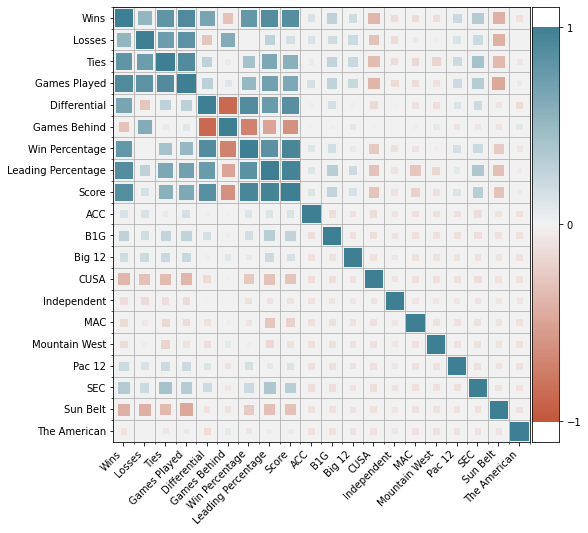

In [ ]:
from heatmap import heatmap, corrplot
import seaborn as sns, matplotlib.pyplot as plt


data['Wins'] = list(map(int, data['Wins'])) 
data['Losses'] = list(map(int, data['Losses'])) 
data['Ties'] = list(map(int, data['Ties'])) 
data['Games Played'] = list(map(int, data['Games Played'])) 
data['Games Behind'] = list(map(int, data['Games Behind'])) 
data['Differential'] = list(map(int, data['Differential'])) 
#dummies = pd.get_dummies(data.Conference)
#data.drop(columns = ["Team", "Conference"], inplace = True)
data = pd.concat([data, dummies], axis=1)
data
plt.figure(figsize=(8, 8))
corrplot(data.corr(), size_scale=300);

In [ ]:
check = data.copy()
#data_ml = data[['Wins','Win Percentage','Leading Series','Leading Percentage']]
data_ml = data[['Win Percentage','Leading Percentage']]
data_ml.head()

,Win Percentage,Leading Percentage
34,0.729831,0.542636
43,0.714470,0.527132
29,0.711349,0.519380
35,0.677182,0.542636
106,0.706589,0.511628


ValueError: ignored

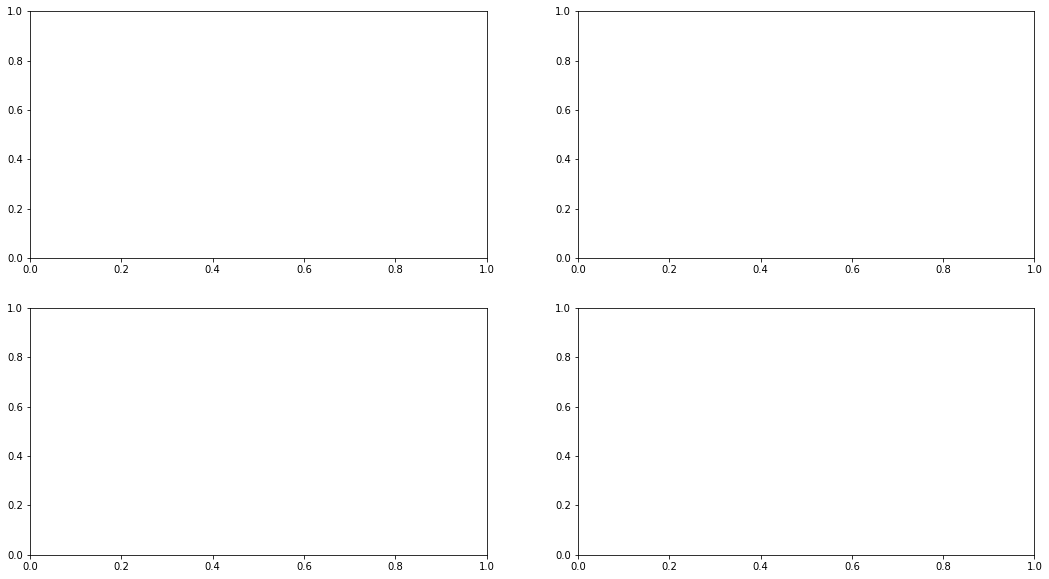

In [ ]:
import seaborn as sns, matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(18, 10))

sns.histplot(ax=axes[0, 0], data = data_ml, x = 'Wins')
sns.histplot(ax=axes[0, 1], data = data_ml, x = 'Win Percentage')
sns.histplot(ax=axes[1, 0], data = data_ml, x = 'Leading Series')
sns.histplot(ax=axes[1, 1], data = data_ml, x = 'Leading Percentage')

### K Means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data_ml)

MinMaxScaler(copy=True, feature_range=(0, 1))

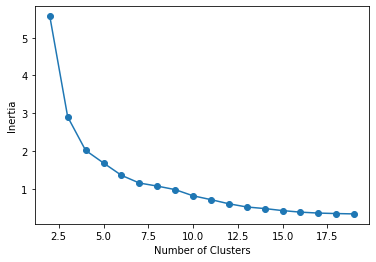

In [ ]:
import seaborn as sns, matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

inertia = []
silhouette = []
list_num_clusters = list(range(2,20))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters,random_state=130,n_init=1)
    data_scale = scaler.transform(data_ml)
    km.fit(data_scale)
    inertia.append(km.inertia_)
    y = km.predict(data_scale)
    silhouette.append(silhouette_score(data_scale, y))
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

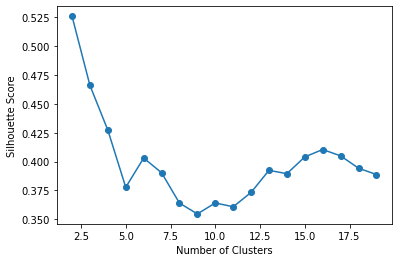

In [ ]:
plt.plot(list_num_clusters,silhouette)
plt.scatter(list_num_clusters,silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [ ]:
num_clusters = 9
km = KMeans(n_clusters=num_clusters,random_state=130,n_init=1) # n_init, number of times the K-mean algorithm will run
data_scale = scaler.fit_transform(data_ml)
km.fit(data_scale)
y = km.predict(data_scale)

In [ ]:
check['Group'] = y
data['Group'] = y

#check_km = check[['Team','Group','Wins','Win Percentage','Leading Series','Leading Percentage']]
check_km = check[['Team','Group','Win Percentage','Leading Percentage']]

check_km.sort_values(by= 'Group', axis = 0, ascending = False) 

,Team,Group,Win Percentage,Leading Percentage
31,Minnesota,8,0.520389,0.441860
38,Wisconsin,8,0.536967,0.480620
45,TCU,8,0.501390,0.372093
114,Missouri,8,0.509572,0.403101
30,Michigan State,8,0.555380,0.410853
118,Texas A&M,8,0.562500,0.418605
128,Texas State,7,0.225989,0.031008
66,New Mexico State,7,0.247573,0.031008
69,UMass,7,0.308036,0.023256
49,Charlotte,7,0.265625,0.015504


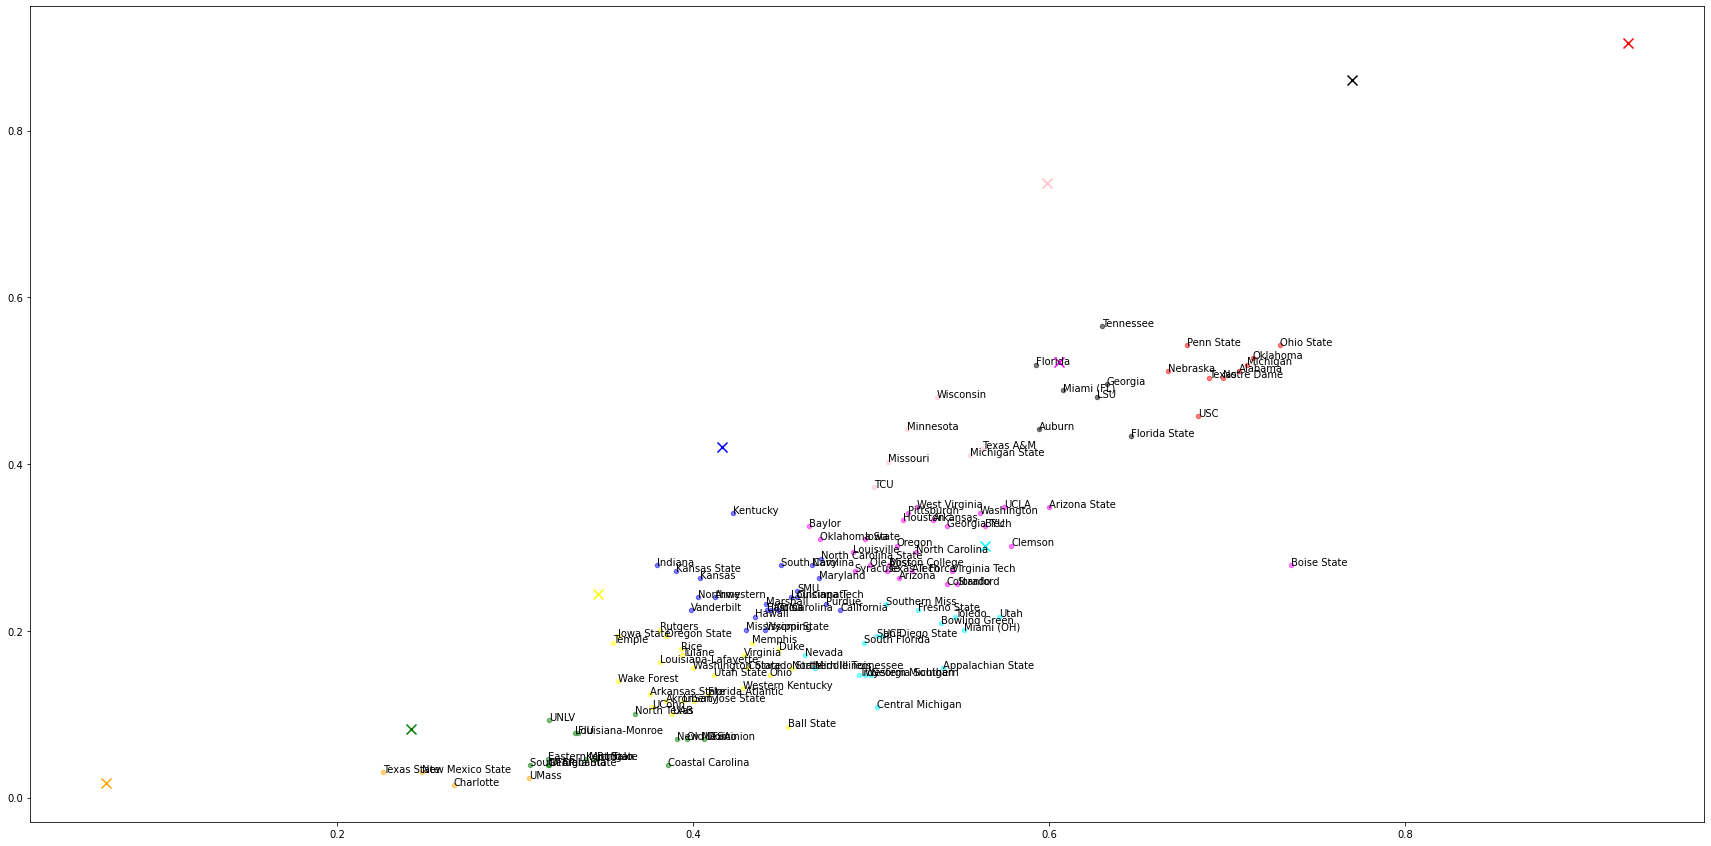

In [ ]:
#color = 'brgcmykop'

plt.figure(figsize=(30,15))
color = ['blue','red','green','cyan','magenta','yellow','black','orange','pink','lime','brown','grey','lavender','blue','red','green','cyan','magenta','yellow','black','orange','pink','lime','brown','grey','lavender']
alpha = 0.5
s = 20
#plt.scatter(data['Win Percentage'],data['Leading Percentage'],c = color[0],alpha = alpha,s = s)
for WP, LP, group, team in zip(check_km['Win Percentage'],check_km['Leading Percentage'],check_km['Group'],check_km['Team']):
    plt.scatter(WP,LP,c = color[group],alpha = alpha,s = s)
    plt.annotate(team,(WP,LP))
for i in range(num_clusters):
    #plt.scatter(km.cluster_centers_[i][1],km.cluster_centers_[i][3],c = color[i], marker = 'x', s = 100)
    plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)


Text(0.5, 1.0, 'K Means Percentages')

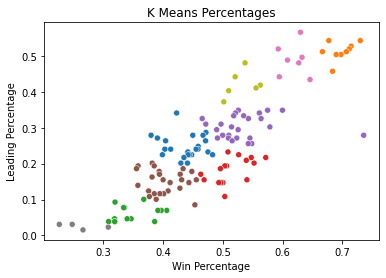

In [ ]:
sns.scatterplot(data=check_km, 
                x="Win Percentage", 
                y="Leading Percentage", 
                hue = "Group", 
                legend= False, 
                palette="tab10")
sns.scatterplot().set_title('K Means Percentages')

In [ ]:
plot_df = check_km.copy()
plot_df['Win Score'] = plot_df['Wins'] * plot_df['Win Percentage']
plot_df['Series Score'] = plot_df['Leading Series'] * plot_df['Leading Percentage']

sns.scatterplot(data=plot_df, 
                x="Win Score", 
                y="Series Score", 
                hue = "Group", 
                legend= False, 
                palette="tab10")
sns.scatterplot().set_title('K Means Scores')

KeyError: ignored

In [ ]:
table = data.groupby(by = ['Group']).mean()
table['Score'] = table['Win Percentage'] + table['Leading Percentage']
table.sort_values(by= 'Score', axis = 0, ascending= False)

,Wins,Losses,Ties,Games Played,Differential,Games Behind,Win Percentage,Leading Percentage,Score,ACC,B1G,Big 12,CUSA,Independent,MAC,Mountain West,Pac 12,SEC,Sun Belt,The American
Group,,,,,,,,,,,,,,,,,,,,
1,754.333333,317.777778,33.444444,1105.555556,436.555556,94.111111,0.697398,0.513351,1.210748,0.000000,0.444444,0.222222,0.000000,0.111111,0.000000,0.000000,0.111111,0.111111,0.000000,0.000000
6,606.428571,368.571429,33.142857,1008.142857,237.857143,122.000000,0.618516,0.489480,1.107996,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.714286,0.000000,0.000000
8,543.666667,478.666667,39.333333,1061.666667,65.000000,206.833333,0.531033,0.421189,0.952222,0.000000,0.500000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000
4,466.576923,412.615385,23.769231,902.961538,53.961538,204.961538,0.534663,0.303220,0.837883,0.307692,0.038462,0.153846,0.000000,0.038462,0.000000,0.076923,0.269231,0.076923,0.000000,0.038462
3,277.750000,255.625000,10.000000,543.375000,22.125000,187.500000,0.513368,0.181686,0.695054,0.000000,0.000000,0.000000,0.125000,0.000000,0.312500,0.187500,0.062500,0.000000,0.187500,0.125000
0,378.173913,490.956522,26.782609,895.913043,-112.782609,299.130435,0.438142,0.247051,0.685193,0.043478,0.217391,0.086957,0.086957,0.043478,0.000000,0.086957,0.043478,0.173913,0.000000,0.217391
5,259.280000,387.560000,15.400000,662.240000,-128.280000,290.160000,0.402606,0.149767,0.552373,0.120000,0.040000,0.040000,0.160000,0.080000,0.160000,0.120000,0.080000,0.000000,0.080000,0.120000
2,131.428571,251.071429,5.928571,388.428571,-119.642857,262.357143,0.348959,0.060908,0.409867,0.000000,0.000000,0.000000,0.357143,0.000000,0.214286,0.142857,0.000000,0.000000,0.285714,0.000000
7,67.750000,199.000000,4.000000,270.750000,-131.250000,261.500000,0.261806,0.025194,0.286999,0.000000,0.000000,0.000000,0.250000,0.500000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000


### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
scaler = MinMaxScaler()
scaler.fit(data_ml)
DB = DBSCAN(eps = .131)
#DB = DBSCAN(eps = .19)
DB.fit(data_scale)
y = DB.labels_
y = y.tolist()
print(y.count(-1))
print(max(y))

1
0


In [ ]:
check['Group'] = y
data['Group'] = y

#check_db = check[['Team','Group','Wins','Win Percentage','Leading Series','Leading Percentage']]
check_db = check[['Team','Group','Win Percentage','Leading Percentage']]

check_db.sort_values(by= 'Group', axis = 0, ascending = False) 

,Team,Group,Win Percentage,Leading Percentage
34,Ohio State,0,0.729831,0.542636
62,Western Kentucky,0,0.427941,0.131783
57,Rice,0,0.393281,0.178295
99,Oregon State,0,0.384896,0.193798
37,Rutgers,0,0.381603,0.201550
84,Colorado State,0,0.430804,0.155039
79,Ohio,0,0.443015,0.147287
11,Virginia,0,0.428413,0.170543
78,Northern Illinois,0,0.455373,0.155039
74,Central Michigan,0,0.503120,0.108527


Text(0.5, 1.0, 'DBSCAN Percentages')

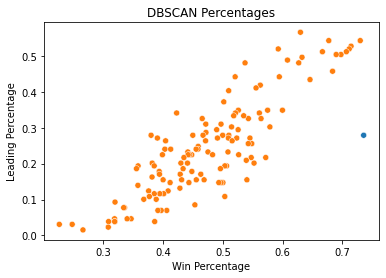

In [ ]:
sns.scatterplot(data=check_db, 
                x="Win Percentage", 
                y="Leading Percentage", 
                hue = "Group", 
                legend= False, 
                palette="tab10")
sns.scatterplot().set_title('DBSCAN Percentages')

In [ ]:
plot_df = check_db.copy()
plot_df['Win Score'] = plot_df['Wins'] * plot_df['Win Percentage']
plot_df['Series Score'] = plot_df['Leading Series'] * plot_df['Leading Percentage']

sns.scatterplot(data=plot_df, 
                x="Win Score", 
                y="Series Score", 
                hue = "Group", 
                legend= False, 
                palette="tab10")
sns.scatterplot().set_title('DBSCAN Scores')

KeyError: ignored

### AG

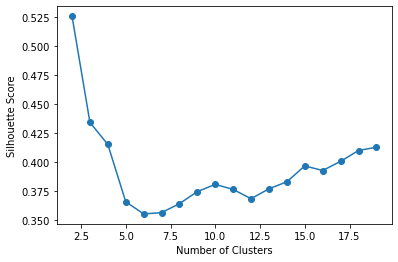

In [ ]:
from sklearn.cluster import AgglomerativeClustering
silhouette = []
list_num_clusters = list(range(2,20))
for num_clusters in list_num_clusters:
    AGG = AgglomerativeClustering(n_clusters=num_clusters)
    data_scale = scaler.transform(data_ml)
    AGG.fit(data_scale)
    #inertia.append(AGG.inertia_)
    y = AGG.fit_predict(data_scale)
    silhouette.append(silhouette_score(data_scale, y))
    
plt.plot(list_num_clusters,silhouette)
plt.scatter(list_num_clusters,silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

In [ ]:
from sklearn.cluster import AgglomerativeClustering
num_clusters = 9
scaler = MinMaxScaler()
scaler.fit(data_ml)
AGG = AgglomerativeClustering(n_clusters= num_clusters)
AGG.fit(data_ml)
y_AGG = AGG.fit_predict(data_scale)

In [ ]:
check['Group'] = y_AGG

check_AGG = check[['Team','Group','Wins','Win Percentage','Leading Series','Leading Percentage']]
#check_AGG = check[['Team','Group','Win Percentage','Leading Percentage']]
check_AGG.sort_values(by= 'Group', axis = 0, ascending = False)

,Team,Group,Wins,Win Percentage,Leading Series,Leading Percentage
83,Boise State,8,242,0.735562,36/129,0.279070
89,San Diego State,7,313,0.503140,25/129,0.193798
97,Colorado,7,532,0.542373,33/129,0.255814
100,Stanford,7,528,0.548241,33/129,0.255814
103,Utah,7,548,0.571648,28/129,0.217054
12,Virginia Tech,7,446,0.545184,35/129,0.271318
20,South Florida,7,117,0.495763,24/129,0.186047
58,Southern Miss,7,330,0.508384,30/129,0.232558
24,UCF,7,167,0.506061,25/129,0.193798
77,Miami (OH),7,449,0.552033,26/129,0.201550


Text(0.5, 1.0, 'Agglomerative Clustering Percentages')

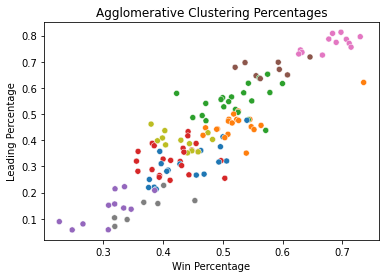

In [ ]:
plot_df = check_AGG.copy()
plot_df['W'] = plot_df['Wins'] * plot_df['Win Percentage']
plot_df['S'] = plot_df['Leading Series'] * plot_df['Leading Percentage']

sns.scatterplot(data=check_AGG, 
                x="Win Percentage", 
                y="Leading Percentage", 
                hue = "Group", 
                legend= False, 
                palette="tab10")
sns.scatterplot().set_title('Agglomerative Clustering Percentages')

Text(0.5, 1.0, 'Agglomerative Clustering Scores')

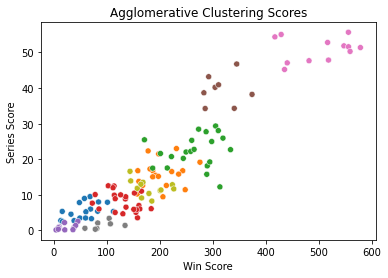

In [ ]:
plot_df = check_AGG.copy()
plot_df['Win Score'] = plot_df['Wins'] * plot_df['Win Percentage']
plot_df['Series Score'] = plot_df['Leading Series'] * plot_df['Leading Percentage']

sns.scatterplot(data=plot_df, 
                x="Win Score", 
                y="Series Score", 
                hue = "Group", 
                legend= False, 
                palette="tab10")
sns.scatterplot().set_title('Agglomerative Clustering Scores')